
# Project: Inverstigate a Dataset(No-Show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
# Introduction

> In this report we will investigate 110,527 medical appointments & its 14 associated variables.
The following is the data description that is found on Kaggle.


>PatientId: Identification of a patient.
>AppointmentID: Identification of each appointment.
>Gender: Male or Female.
>Schedule day : the day the patient set up an appointment day.
>Appointment day: the day the patient was expected to show up.
>Age: How old is the patient.
>Neighbourhood: Where the appointment takes place.
>Scholarship: 1 or 0.
>Hipertension: 1 or 0.
>Diabetes: 1 or 0.
>Alcoholism: 1 or 0.
>Handcap: 0 to 4 indicating the degree of disability.
>SMS_received: 1 or 0.
>No-show: Yes or No where "No" means that the patient showed up.

## Questions that will be asked in the analysis
#### 1- Is there a relation between age and not showing up  for the appointment?
#### 2- Is there a relation between gender and not showing up  for the appointment?
#### 3- Is there a relation between waiting more days since the schedule date and not showing up  for the appoinment?
#### 4- Is there a relation between receiving SMS and not showing up for the appointment?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
# Data Wrangling

> First let's load our dataset in a dataframe to view our data.

### General Properties

In [2]:
df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As shown, we don't have any missing data at any column, let's make the columns lowercase for the ease of use. Also, patient ID data type is float, let's change it to integer

In [4]:
df['PatientId'] = df['PatientId'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [5]:
df.rename(str.lower, axis= 'columns', inplace=True)
df.rename({'no-show':'no_show'},axis= 'columns', inplace=True)
df.sample(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
11788,278423259638655,5722179,M,2016-05-20T07:08:08Z,2016-05-24T00:00:00Z,40,SÃO PEDRO,0,0,0,0,0,0,No
71280,671313139281135,5664871,M,2016-05-05T13:37:49Z,2016-05-11T00:00:00Z,33,BELA VISTA,0,0,0,1,0,1,No
34268,6427944827764,5711731,F,2016-05-18T07:59:47Z,2016-05-18T00:00:00Z,6,SANTO ANDRÉ,0,0,0,0,0,0,No
4684,68739637967484,5732364,F,2016-05-24T11:23:11Z,2016-05-30T00:00:00Z,66,CENTRO,0,0,0,0,0,1,Yes
16499,388867223524235,5648026,F,2016-05-02T14:54:37Z,2016-05-09T00:00:00Z,18,MARIA ORTIZ,0,0,0,0,0,0,Yes


Let's take a quick look at the description of our data

In [6]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### It seems that there is an age value of -1 which doesn't make sense, let's see we have how many values of it

In [7]:
df[df.age==-1].age.value_counts()

-1    1
Name: age, dtype: int64

It seems we have just one value, may be it was a mistake, I think it should have been 1, let's change it

In [8]:
df.loc[df.age==-1, 'age'] = 1
df[df.age==-1].age.value_counts()

Series([], Name: age, dtype: int64)

Let's see if we have any duplicates at either the patient id or the appointment id

In [9]:
df.patientid.duplicated().sum(),df.appointmentid.duplicated().sum()

(48228, 0)

we see that we got duplicates in patient's IDs which show that same patient had more than one appointment

In [10]:
df.set_index('appointmentid',inplace=True)
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointmentid,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


As Appointment id has no duplicates, we can use it as an index



### Data Cleaning

Let's check if we have duplicates and drop them

In [11]:
print('Number of entries before removing dulicates:',df.shape[0])
print('Duplicated entries:',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Number of entries after removing dulicates:',df.shape[0])

Number of entries before removing dulicates: 110527
Duplicated entries: 618
Number of entries after removing dulicates: 109909


Now, let's check for unique values in each column

In [12]:
for column in df.columns.drop(['patientid','scheduledday','appointmentday','neighbourhood']):
    print(f'{column}:{df[column].unique()}\n')

gender:['F' 'M']

age:[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]

scholarship:[0 1]

hipertension:[1 0]

diabetes:[0 1]

alcoholism:[0 1]

handcap:[0 1 2 3 4]

sms_received:[0 1]

no_show:['No' 'Yes']



Let's set appointment and scheduled day columns to date and extract difference between them as waiting days, Also let's create a column with weekdays

In [13]:
df.appointmentday=pd.to_datetime(df.appointmentday).dt.date
df.scheduledday = pd.to_datetime(df.scheduledday).dt.date
df['waiting_days'] = df.appointmentday - df.scheduledday
df['waiting_days'] = df.waiting_days.dt.days
#0 is Monday
df["weekday"] = pd.to_datetime(df["scheduledday"]).dt.day_name()
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,weekday
appointmentid,,,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
5642503,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
5642549,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
5642828,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
5642494,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [14]:
df.waiting_days.value_counts().sort_index()

-6          1
-1          4
 0      38495
 1       5162
 2       6698
        ...  
 155       10
 162       11
 169        8
 176       16
 179       10
Name: waiting_days, Length: 131, dtype: int64

There are some negative values , let's remove them

In [15]:
df=df.drop(df[df.waiting_days< 0].index)
df.waiting_days.value_counts().sort_index()

0      38495
1       5162
2       6698
3       2711
4       5269
       ...  
155       10
162       11
169        8
176       16
179       10
Name: waiting_days, Length: 129, dtype: int64

Let's create a new column with age groups to classify the ages into definite groups

In [16]:
df['age_group']=pd.cut(df['age'],bins=[0,3,16,40,60,103],right=False,
                            labels=['Baby 0-2','Teen 3-15', 'Young Adults 16-39','Middle-aged 40-59', 'Elderly 60+'])
df['age_group'].value_counts().sort_index()

Baby 0-2               7418
Teen 3-15             16952
Young Adults 16-39    34560
Middle-aged 40-59     29895
Elderly 60+           21075
Name: age_group, dtype: int64

In [17]:
df.gender.value_counts()

F    71421
M    38483
Name: gender, dtype: int64

#### Now as our dataset is clean, let's visualize our data

<a id='eda'></a>
# Data Visualization




## A) General exploration "univariate analysis"

### What is the ratio between the two genders?

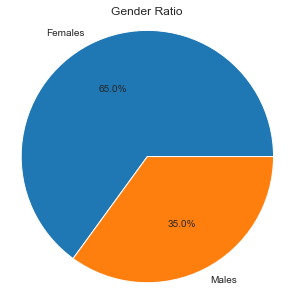

In [18]:
data = df["gender"].value_counts()
my_labels = 'Females','Males'
plt.figure(figsize=(5,5));
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.axis('equal')
plt.savefig('Gender Ratio.png')
plt.show()


This pie chart shows us the ratio of male to female patients which give us insight about the ratio between the two genders.

### How many people showed up for there appointment- knowing that "No" means that the patient showed up-?

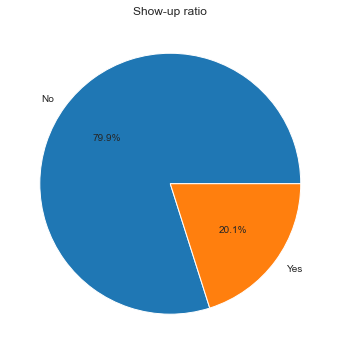

In [19]:
data = df.no_show.value_counts()
x = ['No', 'Yes']
plt.figure(figsize=(6,6));
plt.pie(data,labels=x,autopct='%1.1f%%')
plt.title('Show-up ratio')
plt.savefig('Show-up ratio.png')
plt.show();

This pie chart shows us the ratio between showing up to the appointment and not showing up. It gives us insight that the majority of patients showed up to their appointment.

### What is the distribution of age?

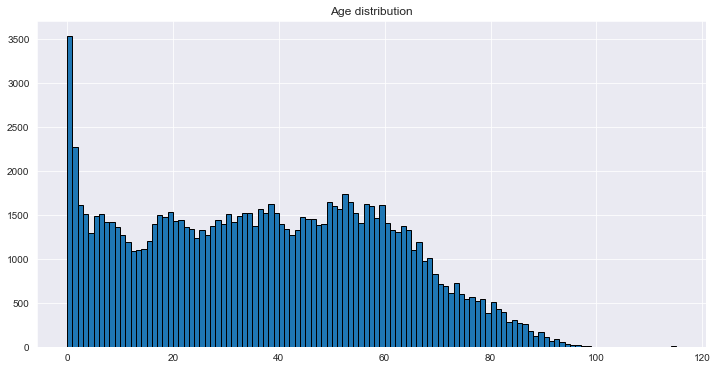

In [20]:
bins = np.arange(0, df['age'].max()+1, 1)
plt.figure(figsize=(12,6));
plt.title('Age distribution')
plt.hist(data=df, x='age', bins=bins,edgecolor='black');
plt.savefig('Age distribution.png')

This histogram shows us the distribution of patients' ages. It shows us that age distribution is almost right skewed.

### How does age group distripution look like?

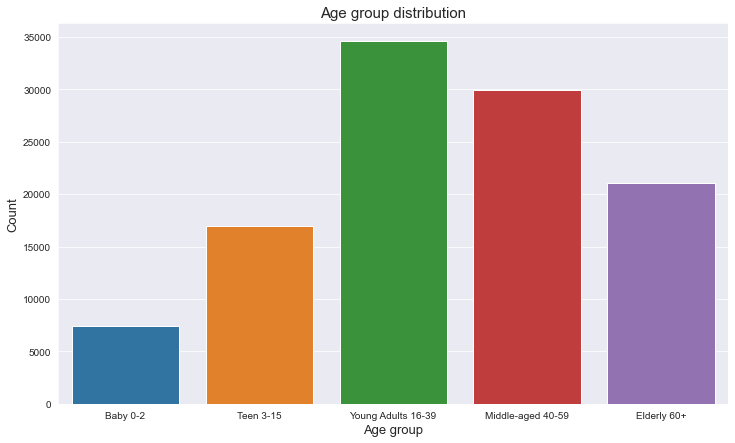

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='age_group');
plt.xlabel('Age group',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Age group distribution',fontsize=15);
plt.savefig('Age group distribution.png')

This bar chart shows us the distribution of different age groups. It seems that most patients lie in young adults group.

### What is the distribution of Neighborhood?

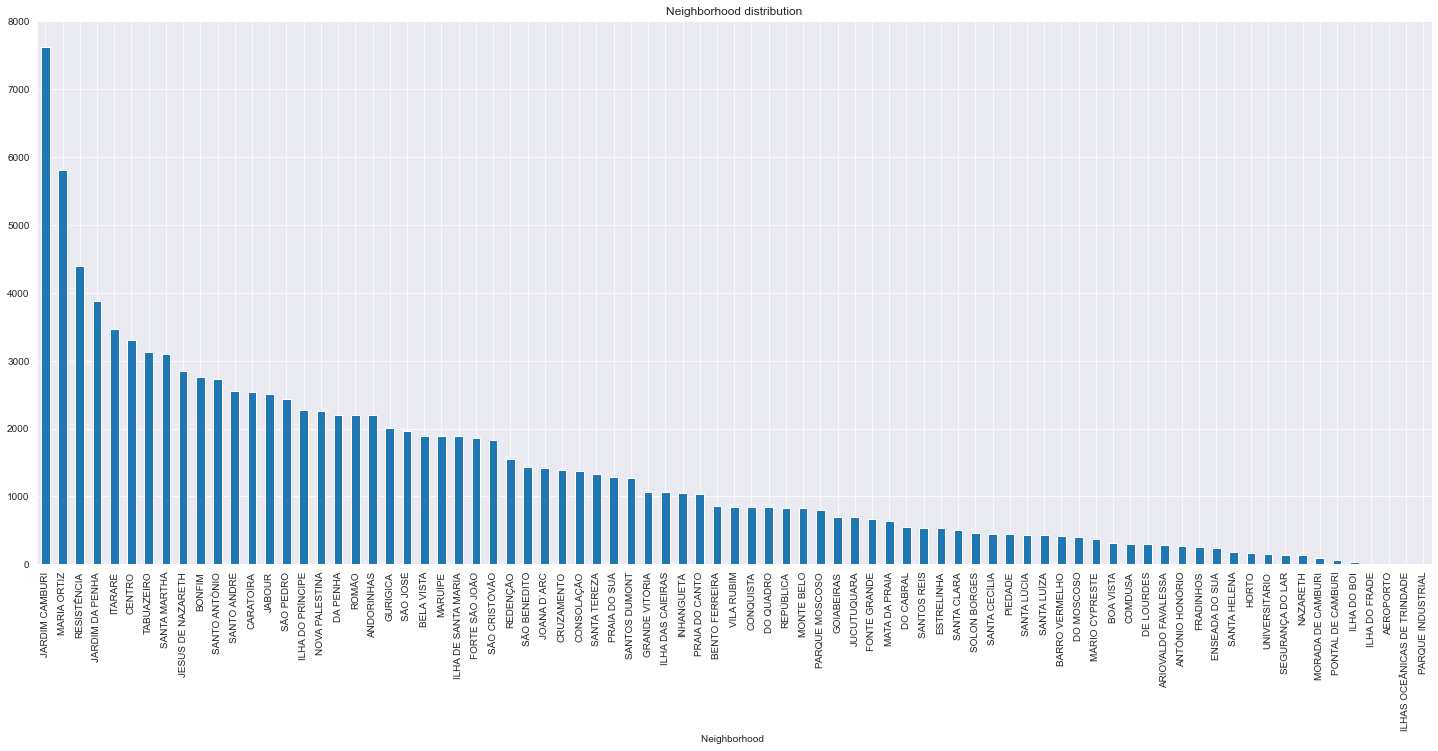

In [22]:
df.neighbourhood.value_counts().plot(kind="bar",figsize=(25,10), title='Neighborhood distribution', xlabel='Neighborhood ');


This bar chart shows the distribution of neighborhoods. 

#### Let's address a function to help us show the distribution of different varibales

In [23]:
def bar_plot(d,var):
    counts=d[var].value_counts().sort_index()
    idx=d[var].value_counts().sort_index().index
    pct=d[var].value_counts(normalize=True).sort_index()
    txt = ['{:0.1f}%'.format(v) for v in pct*100]
    return counts,idx,txt 

### What is the distribution of people having Hypertension?

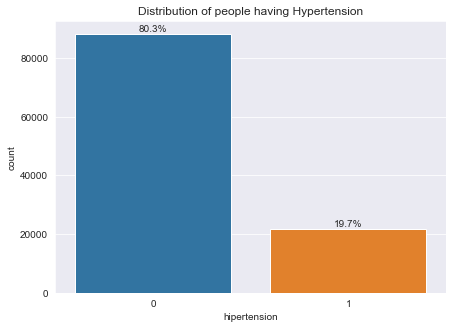

In [24]:
counts,idx,txt = bar_plot(df,'hipertension')
fig=plt.figure(figsize=(7,5))
plt.title('Distribution of people having Hypertension')
g=sns.countplot(data=df ,x='hipertension')
for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')
plt.savefig('Distribution of people having Hypertension.png')    

This bar chart shows the percentage of patients having hypertension vs the one's that don't. Most patients don't have hypertension.

### What is the distribution of people having Diabetes?

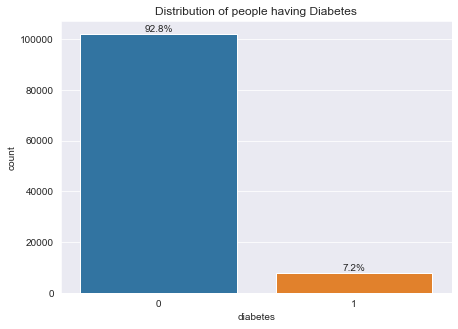

In [25]:
counts,idx,txt = bar_plot(df,'diabetes')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=df ,x='diabetes')
plt.title('Distribution of people having Diabetes')
for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')
plt.savefig('Distribution of people having Diabetes.png')    

This bar chart shows the percentage of patients that don't have diabetes vs the the one's that have diabetes. Most patients don't have diabetes.

### What is the distribution of people drinking alcohols?

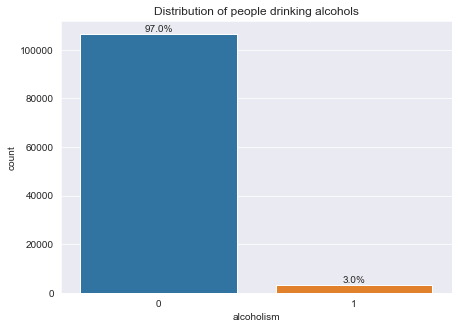

In [26]:
counts,idx,txt = bar_plot(df,'alcoholism')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=df ,x='alcoholism')
plt.title('Distribution of people drinking alcohols')
for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')
plt.savefig('Distribution of people drinking alcohols.png')

This bar chart shows us the percentage of patients drinking alcohol vs the one's that don't. Most patients don't drink alcohol.

### What is the distribution of people that are handicaped?

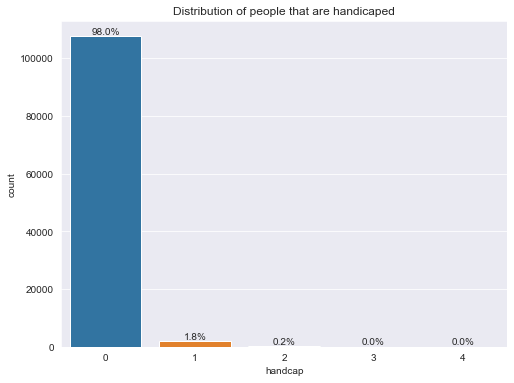

In [27]:
counts,idx,txt = bar_plot(df,'handcap')
fig=plt.figure(figsize=(8,6))
g=sns.countplot(data=df ,x='handcap')
plt.title('Distribution of people that are handicaped')

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')
plt.savefig('Distribution of people that are handicaped.png')    

This bar chart shows us the percentage of patients having disabilities. Most patients don't have disabiblities.

### What is the most frequent scheduled date?

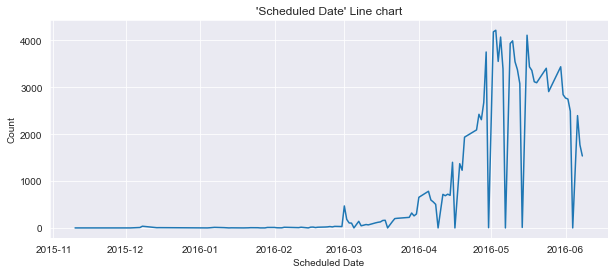

In [28]:
df["scheduledday"].value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Scheduled Date");
plt.ylabel("Count");
plt.title("'Scheduled Date' Line chart");
plt.savefig('Scheduled Date.png')

This line chart shows us the distribution of scheduled date. It looks crowded between 5 and 6 -2016

### What is the most frequent appointment date?

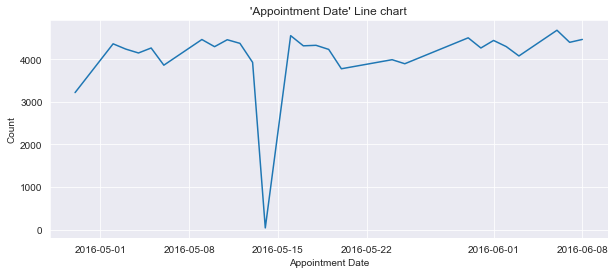

In [29]:
df["appointmentday"].value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Appointment Date");
plt.ylabel("Count");
plt.title("'Appointment Date' Line chart");
plt.savefig('Appointment Date.png')

This line chart shows us the distribution of appointment date. There is a significant drop on 15-5-2016

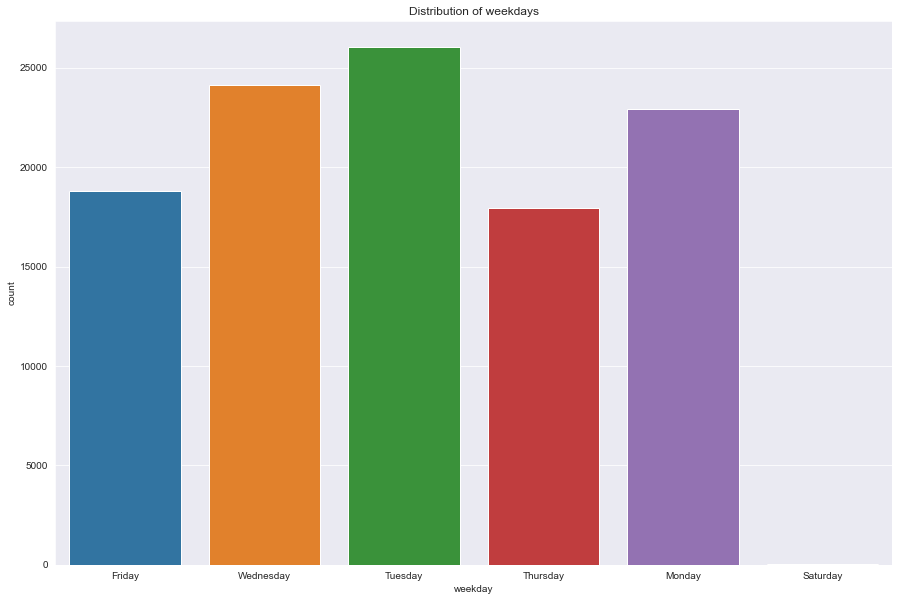

In [30]:
counts,idx,txt = bar_plot(df,'weekday')
fig=plt.figure(figsize=(15,10))
plt.title('Distribution of weekdays')
g=sns.countplot(data=df ,x='weekday')
plt.savefig('Distribution of weekdays.png')

This bar chart shows us the distribution of appointments in each day of the week. Tuesday seems to be the crowdest day, while it seems that they don't work on Saturday at all as there are no appointments scheduled on Saturday at all.

### What is the distribution of waiting days?

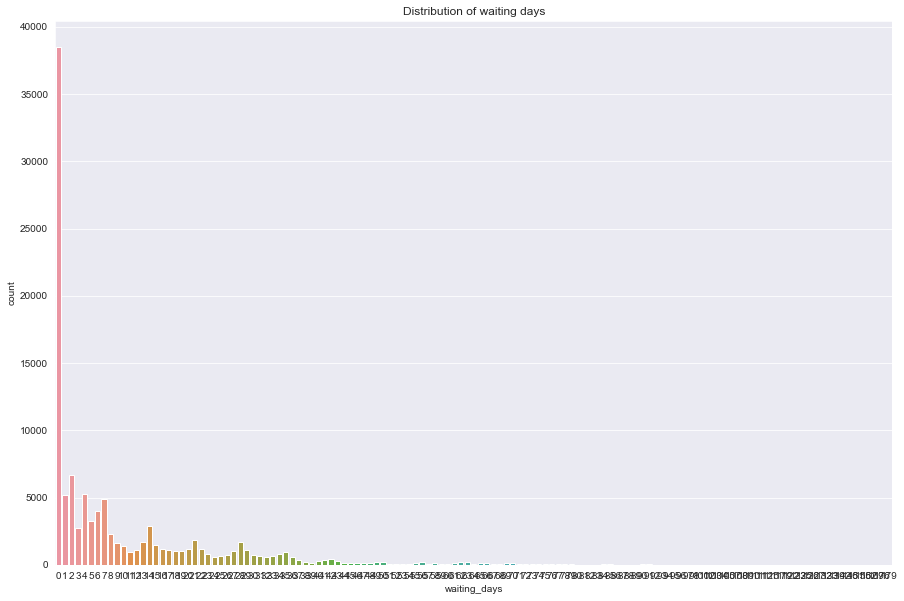

In [31]:
counts,idx,txt = bar_plot(df,'waiting_days')
fig=plt.figure(figsize=(15,10))
plt.title('Distribution of waiting days')
g=sns.countplot(data=df ,x='waiting_days')
plt.savefig('Distribution of waiting days.png')

This bar chart shows us the distribution of waiting days between scheduled date and appointment date. It seems that most appointments are on the same day scheduled.

### What is the distribution of people that received sms?

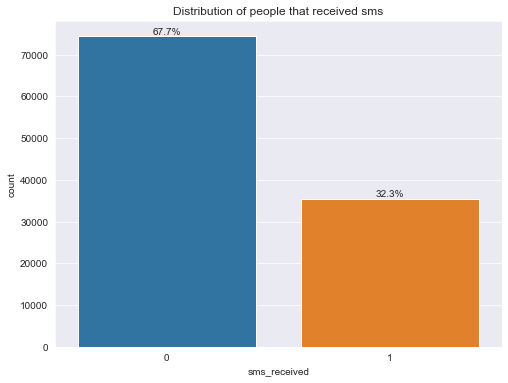

In [32]:
counts,idx,txt = bar_plot(df,'sms_received')
fig=plt.figure(figsize=(8,6))
g=sns.countplot(data=df ,x='sms_received')
plt.title('Distribution of people that received sms')
for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')
plt.savefig('Distribution of people that received sms.png')    

This bar chart shows the percentage of patients receiving SMS. It seems that patients who didn't receive SMS are almost twice the patients who received them.

## B)Exploratory Data Analysis "Bivariate analysis"

### Are the patients who didn't receive sms more likely not to show up?

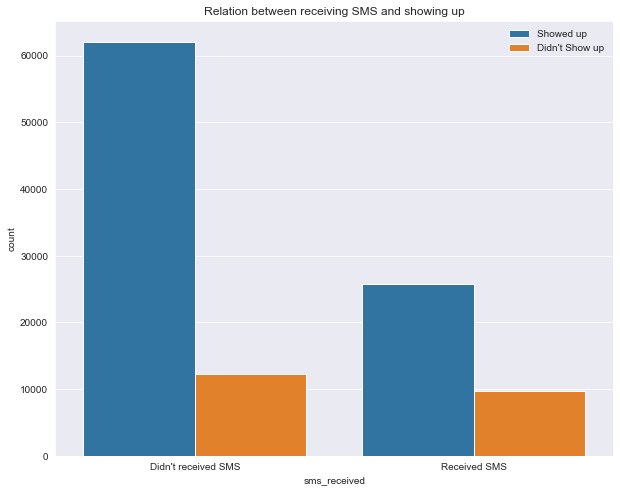

In [33]:
df['no_show_bin']=pd.get_dummies(df['no_show'],drop_first=True)
plt.figure(figsize=(10,8));
plt.title('Relation between receiving SMS and showing up')
sns.countplot(data=df,x='sms_received',hue='no_show_bin',dodge=True)
plt.xticks([0,1],["Didn't received SMS",'Received SMS']);
plt.legend(labels=['Showed up',"Didn't Show up"],title=False,frameon=False);
plt.savefig('Relation between receiving SMS and showing up.png')    

This bar chart shows the relation between receiving SMS message and showing up for appointment. It surprisingly shows that patients who didn't receive SMS message showed up much more than patients who recieved the SMS.

### What is the relation between showing up to appointment and different variables knowing that "No" means that the patient showed up?

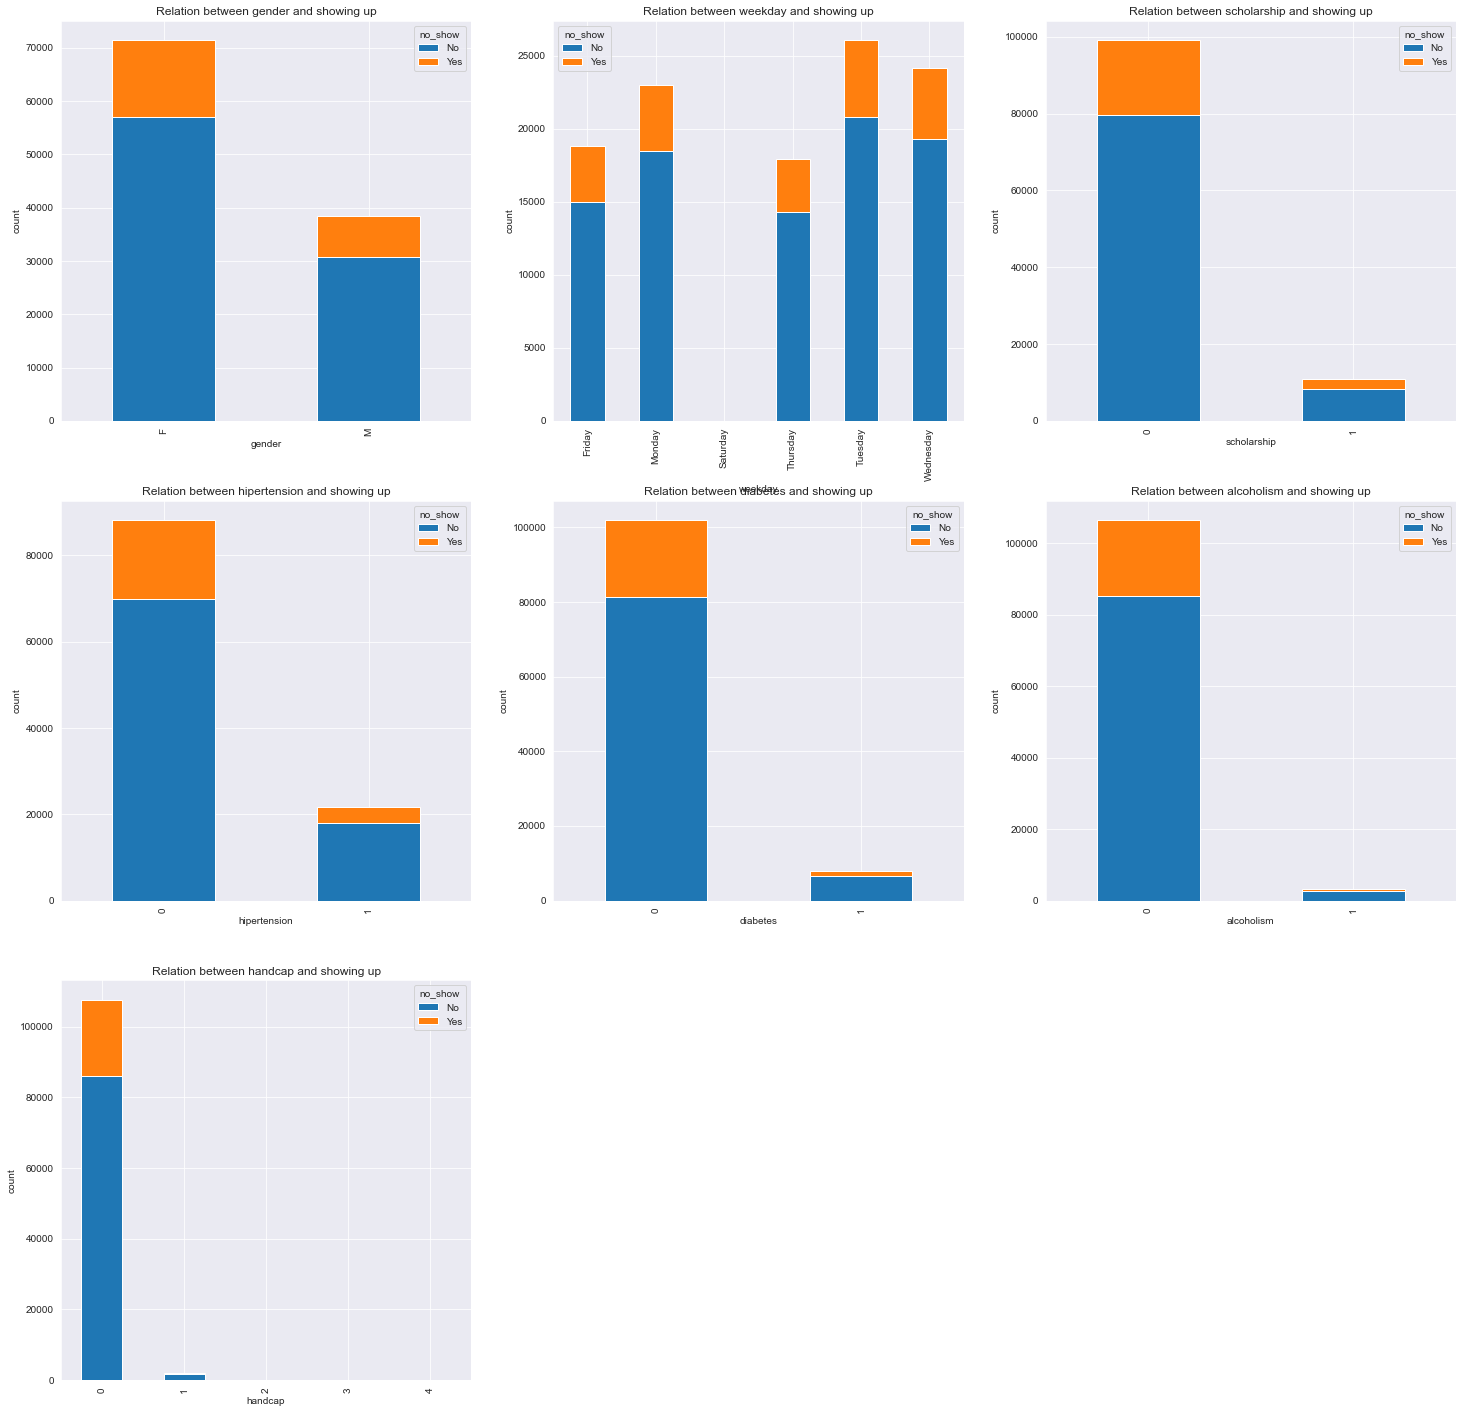

In [49]:
categ_vars = ['gender','weekday', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap']

fig = plt.figure(figsize=(25, 25))
for i, var in enumerate(categ_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True, title= 'Relation between {} and showing up'.format(var), ylabel='count')
plt.savefig('Relation between showing up and different variables.png')        

These bar charts show relation between different categorical varibales like (diabetes, hypertension, scholarship,etc...) and showing up. There is no significant pattern shown.

### What is the relation between showing up and the neighborhood   knowing that "No" means that the patient showed up?

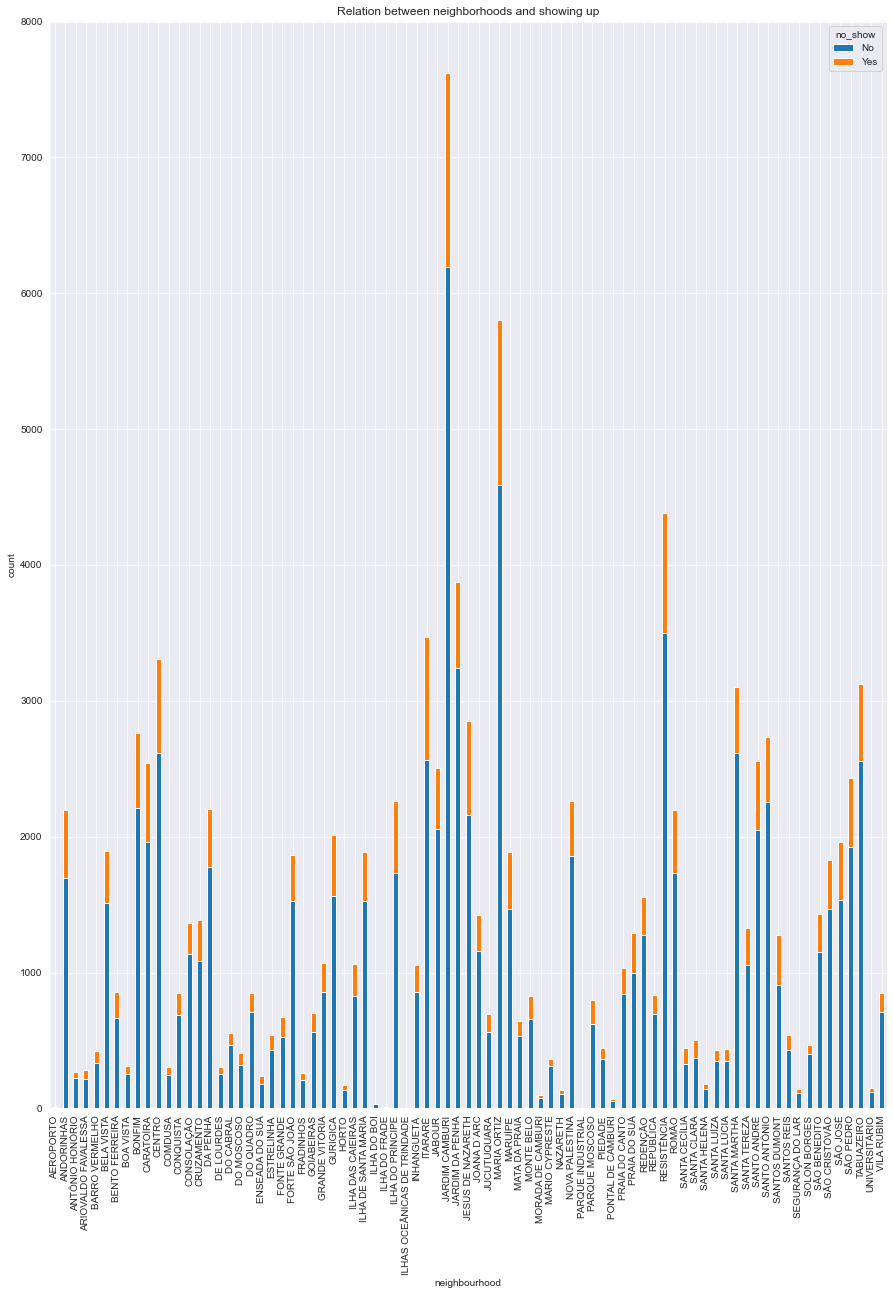

In [48]:
df.groupby(['neighbourhood', 'no_show'])['neighbourhood'].count().unstack('no_show').plot(kind='bar', stacked=True, figsize=(15,20), title= 'Relation between neighborhoods and showing up', ylabel='count' );
plt.savefig('Relation between showing up and the neighborhood.png')    

This bar chart shows the relation between different neighborhoods and showing up. It doesn't show significant pattern.

### What is the relation between age and showing up for appointment ?

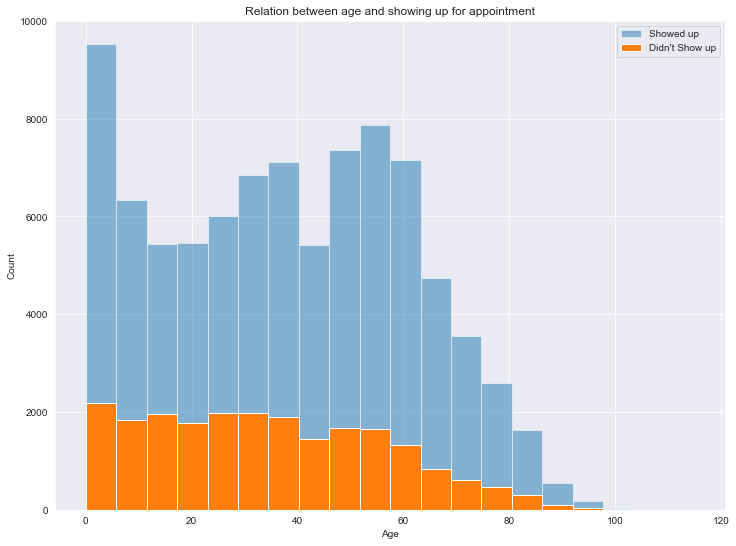

In [45]:
plt.figure(figsize=(12,9));
plt.title('Relation between age and showing up for appointment')
plt.xlabel('Age')
plt.ylabel('Count')
df.age[df.no_show=="No"].hist(alpha=0.5, bins=20, label=('Showed up'));
df.age[df.no_show=="Yes"].hist(alpha=1, bins=20, label=("Didn't Show up"));
plt.legend();
plt.savefig('Relation between age and showing up for appointment.png')    

This histogram shows the relation between different ages and showing up. It shows that the two extremities(very youn and very old) showed up more in comparison to middle ages.

### What is the relation between different age groups and showing up for appointment knowing that "No" means that the patient showed up for appointment?

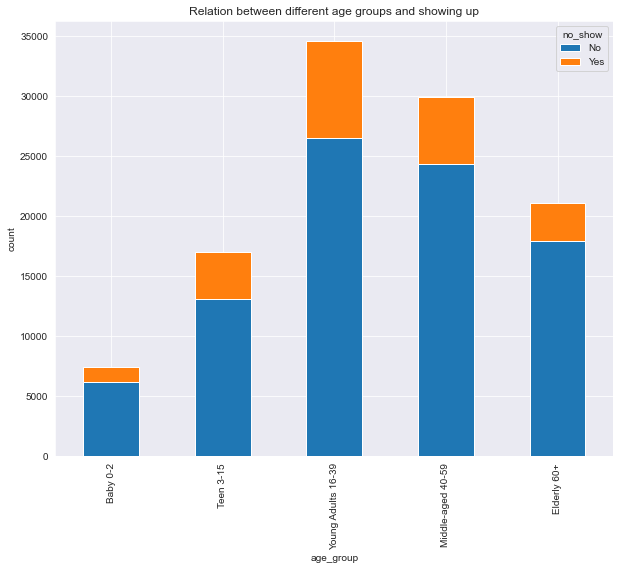

In [47]:
df.groupby(['age_group', 'no_show'])['age_group'].count().unstack('no_show').plot(kind='bar', stacked=True, figsize=(10,8), title= 'Relation between different age groups and showing up', ylabel='count' );
plt.savefig('Relation between different age groups and showing up.png')

This bar chart shows the relation between different age groups and showing up. It confirms the findings of the last histogram.

### What is the relation between waiting days and showing up for appointment where blue color is showing up and orange color is not showing up?

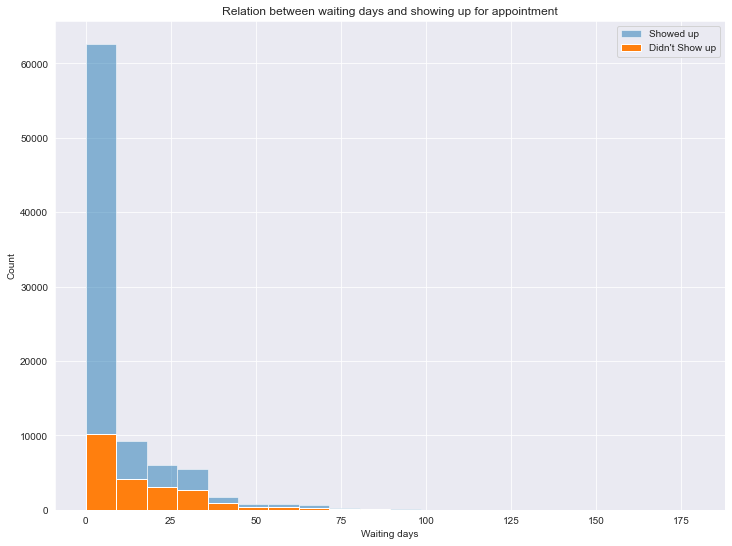

In [46]:
plt.figure(figsize=(12,9));
plt.title('Relation between waiting days and showing up for appointment')
plt.xlabel('Waiting days')
plt.ylabel('Count')
df.waiting_days[df.no_show=="No"].hist(alpha=0.5, bins=20, label=('Showed up'));
df.waiting_days[df.no_show=="Yes"].hist(alpha=1, bins=20, label=("Didn't Show up"));
plt.legend()
plt.savefig('Relation between waiting days and showing up for appointment.png')    

This histogram shows the relation between days of waiting between scheduled date and appointment date and showing up. It shows that waiting more days result in more patients not showing up for their appointment.

<a id='conclusions'></a>
# Conclusions

### A)univariate insights
###### 1- 65% of patients are females while 35% are males.
###### 2- Almost 80% of patients showed up for their appointments while 20% didn't.
###### 3- Most of the patients are between 0-1 years old while the biggest category of patients are young adults(16-39 years old).
###### 4- JARDIM CAMBURI is the neighborhood that biggest amount of patients live in.
###### 5- The majority of patients have no diabetes, not handicaped and not drinking alcohol.
###### 6- Almost 20% of patients have hypertension.
###### 7- Most frequent scheduled date is between 5-2016 and 6-2016.
###### 8- There is a siginificant unexplained drop of appointments on 15-5-2016 as it is neither a weekend nor a holiday.
###### 9- The busiest day of the week is Tuesday.
###### 10- The majority of appointments are on the same scheduled date (No waiting days).
###### 11- Almost 68% of patients didn't receive SMS.

### B) Bivariate insights
###### 1- Even though 68% of patients didn't receive messages, the proportion of patients who didn't receive messages and showed up are much higher than patients who received messages and showed up(Probably related to that most patients are very young).
###### 2- There is no significant relation between gender and not showing up for appointment.
###### 3- All other categorical variables, there is no significant pattern that we can correlate.
###### 4- For relation between age and showing up, it shows that very young and very old ages show up for their appointment more than middle aged patients.
###### 5- For relation between waiting days and showing up, it shows that waiting more days result significantly on not showing up for appointment.

<a id='limitations'></a>
# Limitations
#### 1- Most of the data attributes like diabetes, alcohol,handicaped, sms_received, hipertension and scholarship are imbalanced, and it is difficult to do classification based on them.
#### 2- One of these imbalance issues is demonstrated regarding sms_received and no_show attributes, and at some point it shows that the no_show rate for the group who recieved SMS is higher than that of the group who didn't receive an SMS, which is counterintuitive.
#### 3- There is a very big gap between scheduled and appointment date for some appointments which is unexplained ( more than 100 days)


In [37]:
df.to_csv('No_show_v2.csv')